In [139]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [140]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [141]:
df = pd.read_excel('Sample - Superstore.xls',
                  delimiter = ', ')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [142]:
Furniture = df[df['Category'] == "Furniture"]

Checking order date range

In [143]:
Furniture['Order Date'].min(), Furniture['Order Date'].max()


(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

we have good data of four years

In [144]:
list(df)

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

Removing not necessary columns

In [145]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 
 'Postal Code', 'Region', 'Product ID', 'Category','Sub-Category', 'Product Name', 'Quantity','Discount', 'Profit']
Furniture.drop(cols, axis = 1, inplace = True)
Furniture.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840


In [146]:
Furniture = Furniture.sort_values('Order Date')
Furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [147]:
Furniture = Furniture.groupby('Order Date')['Sales'].sum().reset_index()



Indexing 

In [148]:
Furniture = Furniture.set_index('Order Date')
Furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11', '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19', '2014-01-20', '2014-01-21', '2014-01-26', '2014-01-27', '2014-01-31', '2014-02-08', '2014-02-11', '2014-02-12', '2014-02-18', '2014-02-20', '2014-03-01', '2014-03-03', '2014-03-07', '2014-03-11', '2014-03-14', '2014-03-15', '2014-03-17', '2014-03-18', '2014-03-19', '2014-03-21', '2014-03-22', '2014-03-24', '2014-03-25', '2014-03-28', '2014-03-29', '2014-03-30', '2014-03-31', '2014-04-02', '2014-04-04', '2014-04-06', '2014-04-07', '2014-04-08', '2014-04-12', '2014-04-15', '2014-04-18', '2014-04-19', '2014-04-20', '2014-04-23', '2014-04-25', '2014-04-26', '2014-04-29', '2014-05-04', '2014-05-05', '2014-05-07', '2014-05-10', '2014-05-11', '2014-05-12', '2014-05-13', '2014-05-14', '2014-05-16', '2014-05-18', '2014-05-20', '2014-05-21', '2014-05-25', '2014-05-26', '2014-05-27', '2014-05-30', '2014-06-01', '2014-06-02', '2014-06-03', '2014-06-04', '2014-06-06',
     

use averages daily sales value for month 

In [154]:
y = Furniture['Sales'].resample('MS').mean()
y['2017':]

Order Date
2017-01-01    397.602133 
2017-02-01    528.179800 
2017-03-01    544.672240 
2017-04-01    453.297905 
2017-05-01    678.302328 
2017-06-01    826.460291 
2017-07-01    562.524857 
2017-08-01    857.881889 
2017-09-01    1209.508583
2017-10-01    875.362728 
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

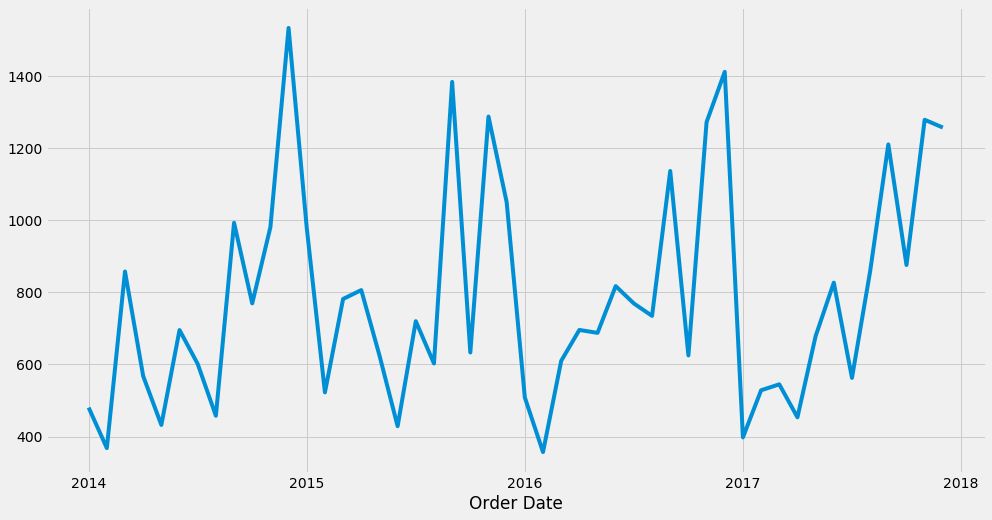

In [165]:
y.plot(figsize = (15, 8))
plt.show()

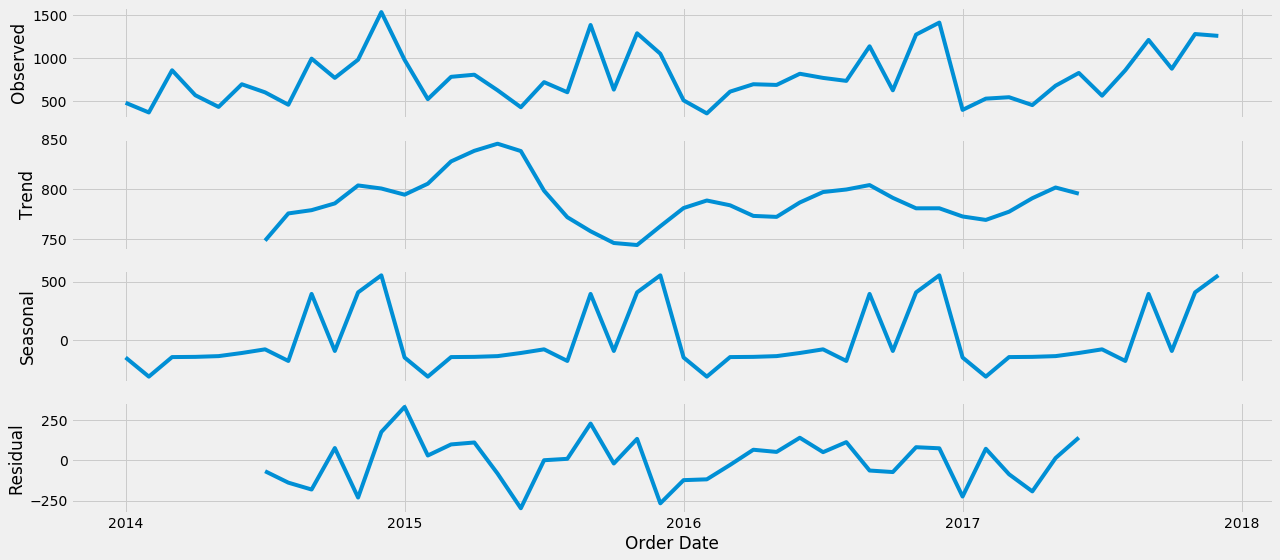

In [166]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

## Time series forecasting with ARIMA

Autoregressive Integrated Moving Average

In [167]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
